In [1]:
import pandas as pd

# Read the JSON file containing Slack users
users_df = pd.read_json('slack/users.json')

# Remove bots and restricted accounts from the DataFrame
users_df = users_df[~(users_df['is_bot'] | users_df['is_workflow_bot'] | users_df['is_restricted'])]

# Create dictionary with selected user information
users_dict = {
    row['id']: {
        'name': row['name'],
        'deleted': row['deleted'],
        'real_name': row['real_name'],
        'tz': row['tz'],
        'tz_label': row['tz_label'],
        'profile': row['profile'],
        'image_512': row['profile']['image_512'] if 'image_512' in row['profile'] else None
    }
    for _, row in users_df.iterrows()
}

# Display first item to verify the structure
list(users_dict.items())[0]

('U015GGN1SBU',
 {'name': 'jeroen',
  'deleted': False,
  'real_name': 'Jeroen Van Hautte',
  'tz': 'Europe/Brussels',
  'tz_label': 'Central European Summer Time',
  'profile': {'title': '',
   'phone': '',
   'skype': '',
   'real_name': 'Jeroen Van Hautte',
   'real_name_normalized': 'Jeroen Van Hautte',
   'display_name': 'Jeroen',
   'display_name_normalized': 'Jeroen',
   'fields': {'Xf025DQTHFL6': {'value': 'https://calendar.google.com/calendar/selfsched?sstoken=UUtyVEFjRWozS3JyfGRlZmF1bHR8ODcxYjFmNTlkNDljNDQ1YTQxYjZkMDJjNDNkNjJkNDk',
     'alt': ''}},
   'status_text': 'Vacationing',
   'status_emoji': ':christmas_tree:',
   'status_emoji_display_info': [{'emoji_name': 'christmas_tree',
     'display_url': 'https://a.slack-edge.com/production-standard-emoji-assets/14.0/apple-large/1f384.png',
     'unicode': '1f384'}],
   'status_expiration': 0,
   'avatar_hash': 'e4b428b843e2',
   'image_original': 'https://avatars.slack-edge.com/2023-10-25/6091453713091_e4b428b843e2b8333bef_o

In [2]:
len(users_dict)

144

In [3]:
import json

def get_channel_members():
    """
    Parse channels.json file and return a list of member lists for each channel.
    
    Returns:
        list: A list where each inner list contains the member IDs for a channel
    """
    # Read the JSON file
    with open('slack/channels.json', 'r') as f:
        channels_data = json.load(f)
    
    # Extract member lists from each channel
    # If channels_data is a list, use it directly; if it's a dict, wrap it in a list
    channels = channels_data if isinstance(channels_data, list) else [channels_data]
    
    # Get members list for each channel
    channel_members = [channel['members'] for channel in channels]
    
    return channel_members

members_by_channel = get_channel_members()


In [5]:
# Convert member IDs to usernames for each channel
members_by_channel_readable = []
for channel_members in members_by_channel:
    readable_members = []
    for member_id in channel_members:
        if member_id in users_dict and 'name' in users_dict[member_id]:
            readable_members.append(users_dict[member_id]['name'])
    members_by_channel_readable.append(readable_members)

# Display the first few channels' members with readable names
members_by_channel_readable[:10]


[['thibo',
  'vincent',
  'matthias',
  'michiel',
  'niels',
  'silas',
  'arne',
  'stijn',
  'gilles',
  'toon',
  'bernd',
  'robbe',
  'tibo',
  'simeon',
  'lindert',
  'thomas',
  'anthony',
  'marijn',
  'lennert.demey',
  'enrico',
  'jacob.demuynck',
  'bram.desimpelaere',
  'niels.thiel',
  'bram.verhulst',
  'michiel.dewilde',
  'mikkel.skovdal',
  'fangio.vandevelde'],
 ['jeroen',
  'mikael',
  'thibo',
  'vincent',
  'matthias',
  'andreas_de_neve',
  'michiel',
  'jensjoris',
  'niels',
  'samy',
  'jonathan',
  'silas',
  'julius',
  'arne',
  'amber',
  'ophelie',
  'stijn',
  'gilles',
  'arnaud',
  'olivier',
  'toon',
  'andries',
  'bernd',
  'severine',
  'margot',
  'robbe',
  'jordan',
  'tibo',
  'simeon',
  'lindert',
  'thomas',
  'anthony',
  'marijn',
  'vicky',
  'holly',
  'damien',
  'thomas.vanvaerenbergh',
  'karen',
  'julie',
  'lennert566',
  'robbe.simoens',
  'fiona.c',
  'alya',
  'mathieu',
  'lennert.demey',
  'eniko',
  'yasamin.karimi',
  'en

In [6]:
from coherence import InventoryCoherence

N_COMPONENTS = 30
IC = InventoryCoherence(members_by_channel_readable, n_components=N_COMPONENTS, shift_term=1)


In [7]:
readable_users = list(users_dict.keys())
readable_users = [users_dict[uid]['name'] for uid in readable_users]

print(readable_users)

['jeroen', 'lieselot', 'mikael', 'thibo', 'kasra', 'ben', 'vincent', 'matthias', 'samuel', 'andreas_de_neve', 'michiel', 'omkar', 'riath', 'josef', 'bartel', 'davidvrdupre', 'evy', 'vic', 'jensjoris', 'niels', 'kasra880', 'dietrich', 'usman', 'sven337', 'clara', 'victor', 'rob', 'piet866', 'samy', 'cyal4', 'jga33', 'ananya', 'vicdegraeve', 'jonathan', 'zoi.tsangalidou', 'sp928', 'silas', 'anabel', 'gp500', 'ruben', 'pieter', 'maria', 'lorenzo', 'julius', 'arne', 'tdk', 'amber', 'ophelie', 'stijn', 'elien', 'borek', 'raluca', 'bilge', 'gilles', 'mert', 'arnaud', 'victor.matthijs', 'sophie', 'serafina', 'evelyne', 'jenna', 'olivier', 'toon', 'gregory', 'aga', 'paopao', 'sarthak', 'charlotte', 'lowie', 'samuel.yau', 'oliver', 'andries', 'bernd', 'severine', 'margot', 'robbe', 'jordan', 'tibo', 'simeon', 'lindert', 'thomas', 'anthony', 'rigas', 'marijn', 'decoster.michel', 'vicky', 'jade', 'holly', 'damien', 'dan', 'jeff', 'jennifer', 'thomas.vanvaerenbergh', 'karen', 'julie', 'lennert', '

In [8]:
occurring_readable_users = [user for user in readable_users if user in IC.entity_count_dict]

In [9]:
X_items = 50

#get the top X entities
top_entities_dict = {entity: count for entity, count in sorted(IC.entity_count_dict.items(), key=lambda item: item[1], reverse=True)[:X_items]}
print("top entities= ", top_entities_dict)

top_entities = list(top_entities_dict.keys())


top entities=  {'marijn': 177, 'matthias': 167, 'mikael': 160, 'olivier': 154, 'jensjoris': 150, 'jeroen': 150, 'thibo': 147, 'samy': 138, 'robbe': 137, 'arnaud': 137, 'silas': 135, 'andreas_de_neve': 134, 'jonathan': 131, 'margot': 130, 'thomas.vanvaerenbergh': 129, 'mathieu': 128, 'arne': 125, 'julius': 121, 'gilles': 119, 'niels': 117, 'vincent': 117, 'lindert': 114, 'michiel': 110, 'thomas': 109, 'tibo': 106, 'robbe.simoens': 106, 'stijn': 104, 'toon': 103, 'severine': 102, 'andries': 101, 'simeon': 98, 'bernd': 90, 'jordan': 87, 'jacob.demuynck': 86, 'anthony': 86, 'damien': 86, 'yasamin.karimi': 83, 'paynter': 80, 'enrico': 79, 'amaury': 77, 'niels.thiel': 76, 'ella.dekeyne': 74, 'jonas.sleeuwaert': 74, 'bram.desimpelaere': 72, 'lennert.demey': 70, 'ophelie': 70, 'amber': 70, 'fangio.vandevelde': 69, 'ward.vermeulen': 66, 'mikkel.skovdal': 64}


In [10]:
X_items = 15

#get the top X entities
top_entities_dict = {entity: count for entity, count in sorted(IC.entity_count_dict.items(), key=lambda item: item[1], reverse=True)[:X_items]}
print("top entities= ", top_entities_dict)

top_entities_15 = list(top_entities_dict.keys())


top entities=  {'marijn': 177, 'matthias': 167, 'mikael': 160, 'olivier': 154, 'jensjoris': 150, 'jeroen': 150, 'thibo': 147, 'samy': 138, 'robbe': 137, 'arnaud': 137, 'silas': 135, 'andreas_de_neve': 134, 'jonathan': 131, 'margot': 130, 'thomas.vanvaerenbergh': 129}


In [11]:
X_items = 30

#get the top X entities
top_entities_dict = {entity: count for entity, count in sorted(IC.entity_count_dict.items(), key=lambda item: item[1], reverse=True)[:X_items]}
print("top entities= ", top_entities_dict)

top_entities_30 = list(top_entities_dict.keys())


top entities=  {'marijn': 177, 'matthias': 167, 'mikael': 160, 'olivier': 154, 'jensjoris': 150, 'jeroen': 150, 'thibo': 147, 'samy': 138, 'robbe': 137, 'arnaud': 137, 'silas': 135, 'andreas_de_neve': 134, 'jonathan': 131, 'margot': 130, 'thomas.vanvaerenbergh': 129, 'mathieu': 128, 'arne': 125, 'julius': 121, 'gilles': 119, 'niels': 117, 'vincent': 117, 'lindert': 114, 'michiel': 110, 'thomas': 109, 'tibo': 106, 'robbe.simoens': 106, 'stijn': 104, 'toon': 103, 'severine': 102, 'andries': 101}


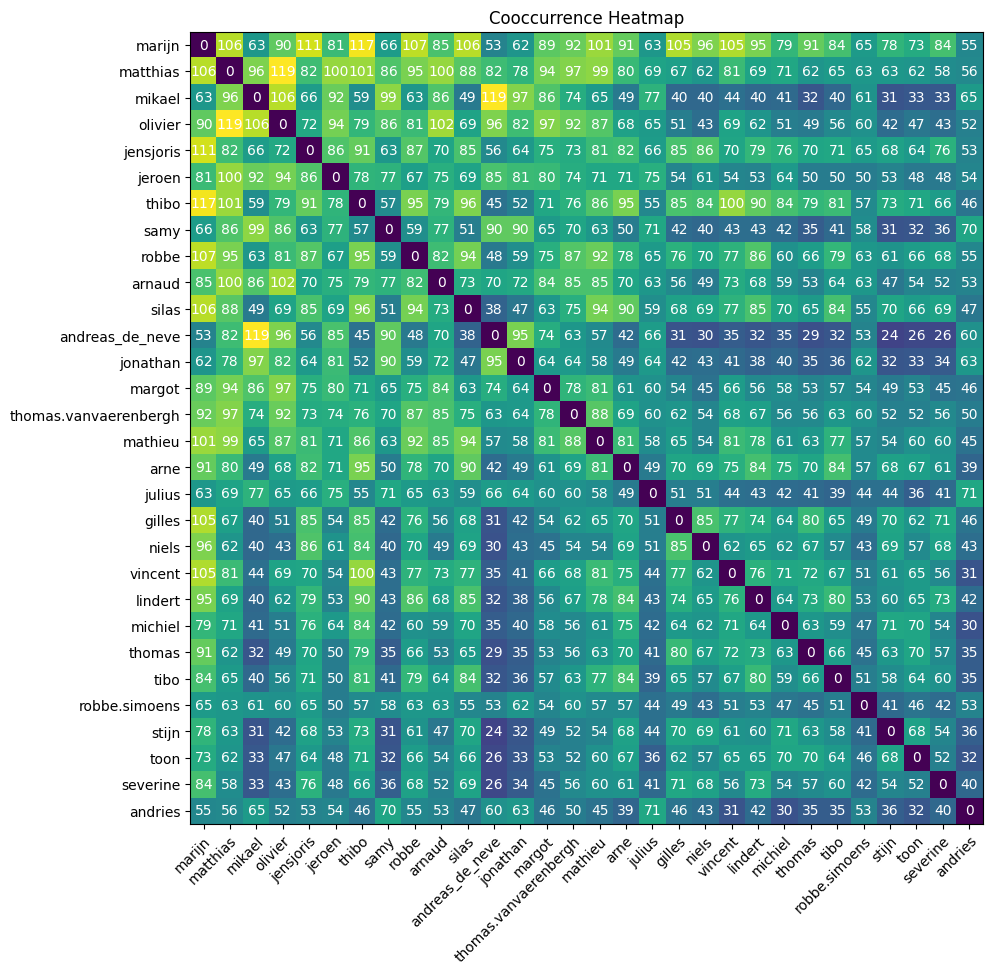

In [12]:
IC.plot_cooccurrence_heatmap(top_entities_30, figsize=10)


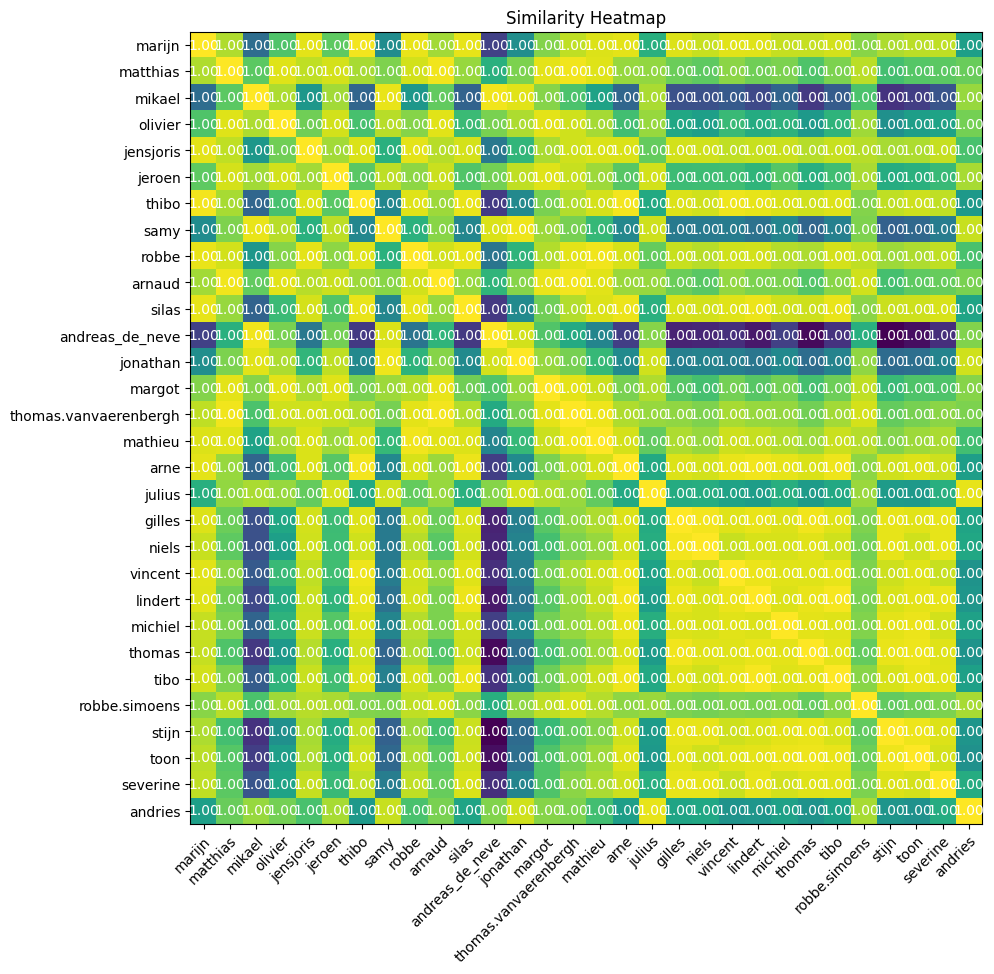

In [13]:
IC.plot_similarity_heatmap(top_entities_30, figsize=10)


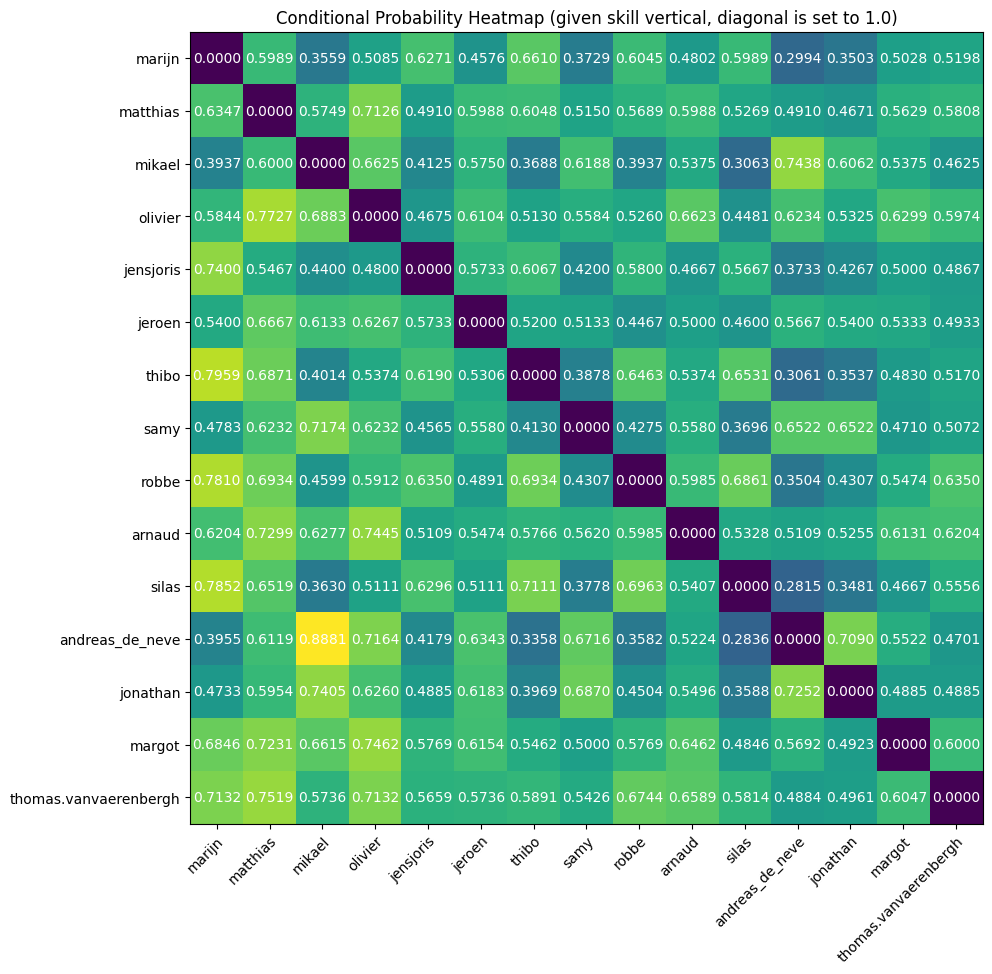

In [14]:
IC.plot_conditional_probability_heatmap(top_entities_15, figsize=10, fill_diagonal=False)


In [15]:
import numpy as np

def get_top_matches(reference_entity, candidate_entities, top_k=10):
    # Retrieve embeddings for the reference entity and candidate entities
    reference_embedding = IC.get_embeddings([reference_entity]).reshape(-1)
    candidate_embeddings = IC.get_embeddings(candidate_entities).reshape(-1, N_COMPONENTS)

    # Compute the cosine similarity between the reference and each candidate
    dot_products = np.dot(candidate_embeddings, reference_embedding)
    reference_norm = np.linalg.norm(reference_embedding)
    candidate_norms = np.linalg.norm(candidate_embeddings, axis=1)
    cosine_similarities = dot_products / (reference_norm * candidate_norms)

    # Get the top k indices with the highest cosine similarity scores
    top_k_indices = np.argsort(-cosine_similarities)[:top_k]

    # Return the top k candidate entities based on these indices
    top_matches = [candidate_entities[i] for i in top_k_indices]
    return top_matches

In [16]:
get_top_matches("marijn", occurring_readable_users)

['marijn',
 'thibo',
 'robbe',
 'silas',
 'jensjoris',
 'arne',
 'vincent',
 'lindert',
 'mathieu',
 'gilles']

In [17]:
get_top_matches("niels", occurring_readable_users)

['niels',
 'gilles',
 'severine',
 'stijn',
 'simeon',
 'thomas',
 'anthony',
 'lindert',
 'jacob.demuynck',
 'michiel']

In [18]:
get_top_matches("jeroen", occurring_readable_users)

['jeroen',
 'margot',
 'yasamin.karimi',
 'matthias',
 'olivier',
 'julius',
 'arnaud',
 'thomas.vanvaerenbergh',
 'jonathan',
 'samy']

In [19]:
get_top_matches("margot", occurring_readable_users)

['margot',
 'yasamin.karimi',
 'arnaud',
 'olivier',
 'matthias',
 'thomas.vanvaerenbergh',
 'jeroen',
 'mathieu',
 'ella.dekeyne',
 'robbe.simoens']

In [20]:
get_top_matches("vincent", occurring_readable_users)

['vincent',
 'thibo',
 'lindert',
 'arne',
 'simeon',
 'tibo',
 'marijn',
 'michiel',
 'thomas',
 'gilles']

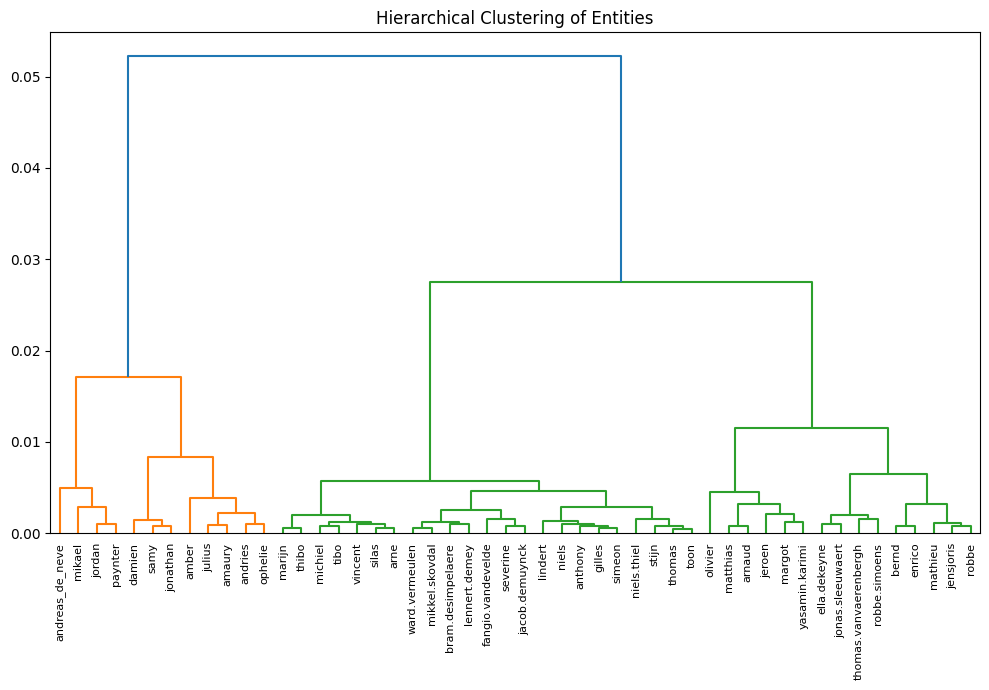

In [21]:
# Perform hierarchical clustering on the similarity matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Get similarity matrix
similarity_matrix = IC.get_similarity_matrix(top_entities)

# Convert similarity to distance (1 - similarity since higher similarity = closer)
distance_matrix = 1 - similarity_matrix

# Compute linkage matrix directly using scipy
Z = linkage(distance_matrix, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=top_entities, leaf_rotation=90)
plt.title('Hierarchical Clustering of Entities')
plt.tight_layout()
plt.show()

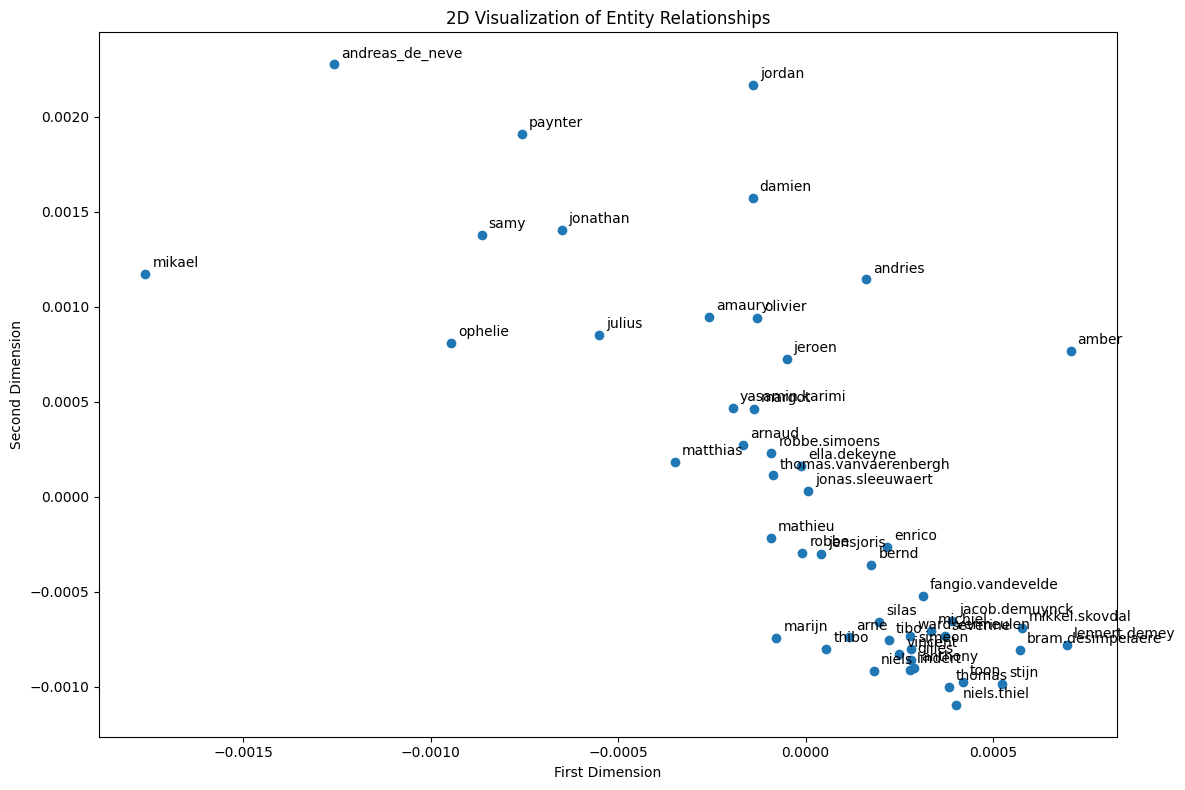

In [25]:
# Reduce dimensionality to 2D using MDS
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Create MDS model and fit to distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
coords_2d = mds.fit_transform(distance_matrix)

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1])

# Add labels for each point
for i, entity in enumerate(top_entities):
    plt.annotate(entity, (coords_2d[i, 0], coords_2d[i, 1]), 
                xytext=(5, 5), textcoords='offset points')

plt.title('2D Visualization of Entity Relationships')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.tight_layout()
plt.show()


In [2]:
# Reduce dimensionality to 2D using MDS
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Get similarity matrix and convert to distance matrix
similarity_matrix = IC.get_similarity_matrix(top_entities)
distance_matrix = 1 - similarity_matrix

# Rest of the MDS and clustering code
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
coords_2d = mds.fit_transform(distance_matrix)

# Perform clustering
n_clusters = 4  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(coords_2d)

# Create scatter plot with colors by cluster
plt.figure(figsize=(12, 8))
scatter = plt.scatter(coords_2d[:, 0], coords_2d[:, 1], c=clusters, cmap='Set3')

# Add labels for each point
for i, entity in enumerate(top_entities):
    plt.annotate(entity, (coords_2d[i, 0], coords_2d[i, 1]), 
                xytext=(5, 5), textcoords='offset points')

plt.title('2D Visualization of Entity Relationships (Clustered)')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

NameError: name 'IC' is not defined